# Visualizing NeuroTycho monkey Visual Grating results


In [3]:
import sys
# sys.path.append('/Users/Lauren/Voytek/spectralCV')
sys.path.append('/Users/SP/code/spectralCV')
sys.path.append('/Users/SP/code/neurodsp/')
sys.path.append('/Users/SP/code/fooof/')

sys.path.append('/Users/rdgao/Documents/code/research/spectralCV')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')
sys.path.append('/Users/rdgao/Documents/code/research/fooof/')

In [11]:
%matplotlib inline

# imports
from scv_funcs import access_nt as asc
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os
from scv_funcs import utils
CKEYS = plt.rcParams['axes.prop_cycle'].by_key()['color']

import neurodsp as ndsp
# from fooof import FOOOFGroup
from scv_funcs import lfpca

In [12]:
# data_path = "/Users/Lauren/Data/NeuroTycho/VisualGrating/20100723S1_VGT_K2_KazuhitoTakenaka-ToruYanagawa_mat_ECoG128-Event3/"
data_path = "/Volumes/VLABB/Neurotycho/VisualGrating/20100723S1_VGT_K2_KazuhitoTakenaka-ToruYanagawa_mat_ECoG128-Event3/"
# setting event data into pandas dataframe
matfile = io.loadmat(data_path + 'Event.mat', squeeze_me=True)
EventData = matfile['EventData']
EventIndex = matfile['EventIndex']

df = pd.DataFrame(data = [EventData, EventIndex]).T
df = df.rename(columns={0: 'EventData', 1: 'EventIndex'})

In [5]:
saveout_path = "../results/nt_vg/"
lfpca_files = sorted([f for f in os.listdir(saveout_path) if 'lfpca_' in f])
# fooof_files = sorted([f for f in os.listdir(saveout_path) if 'fooof' in f])

/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


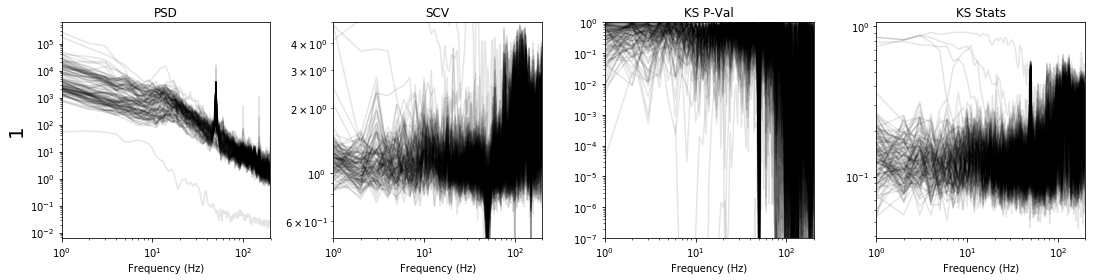

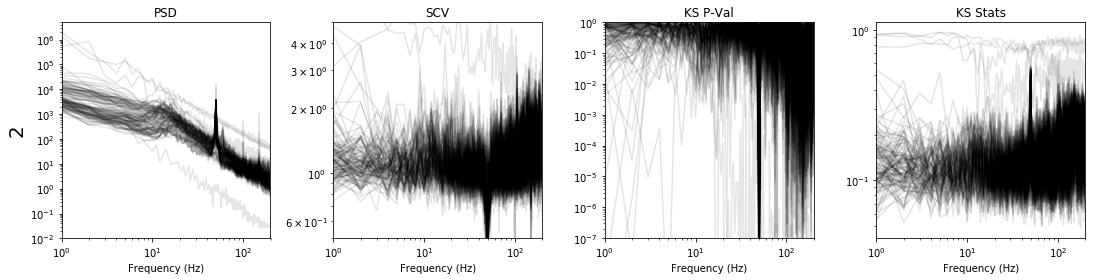

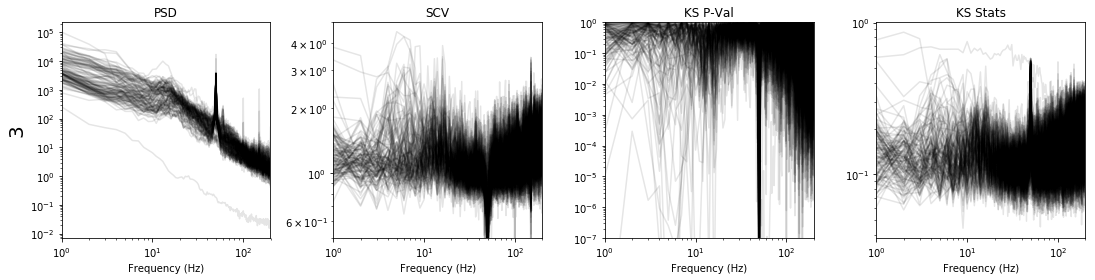

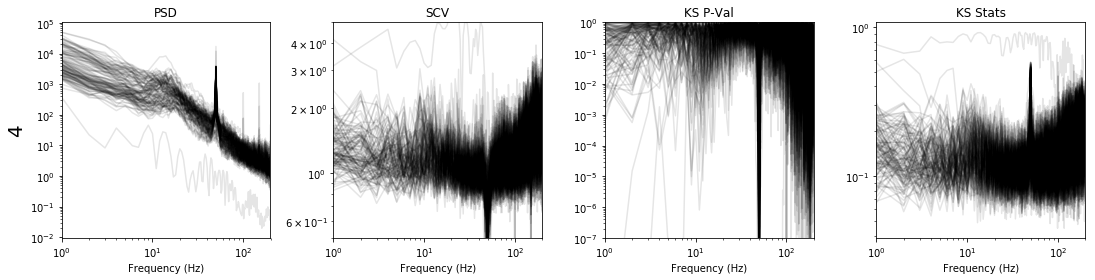

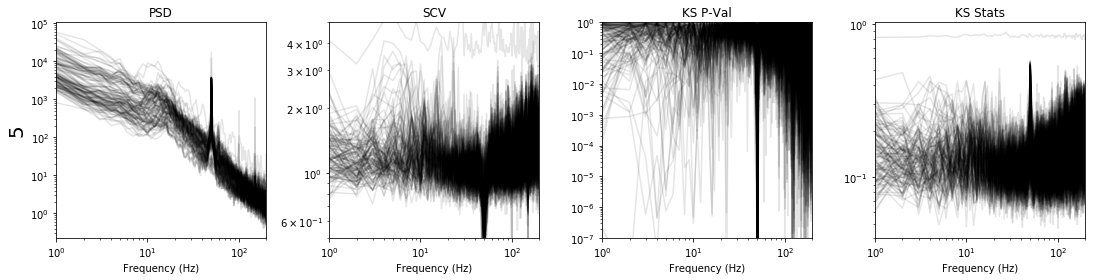

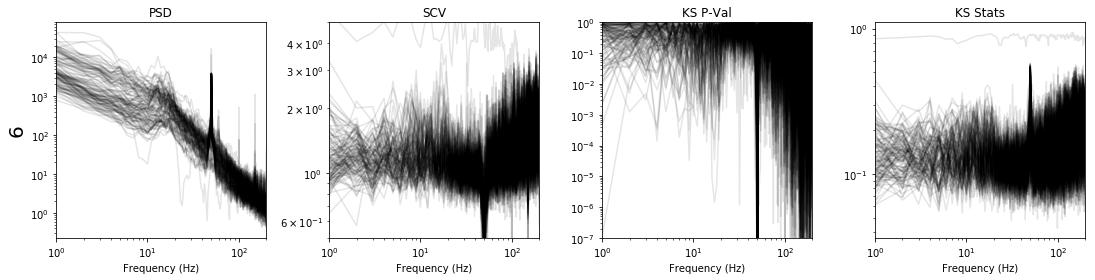

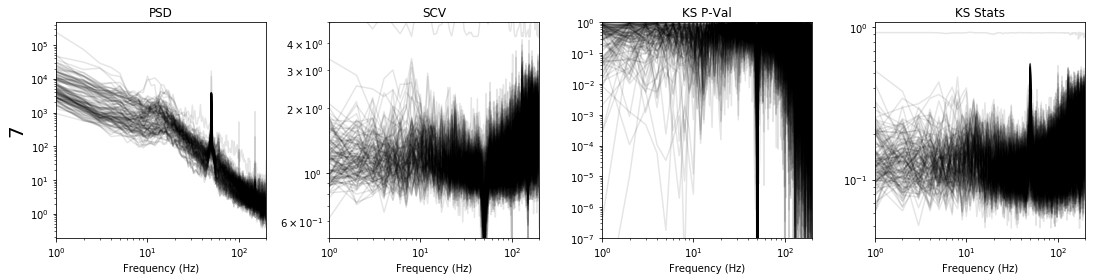

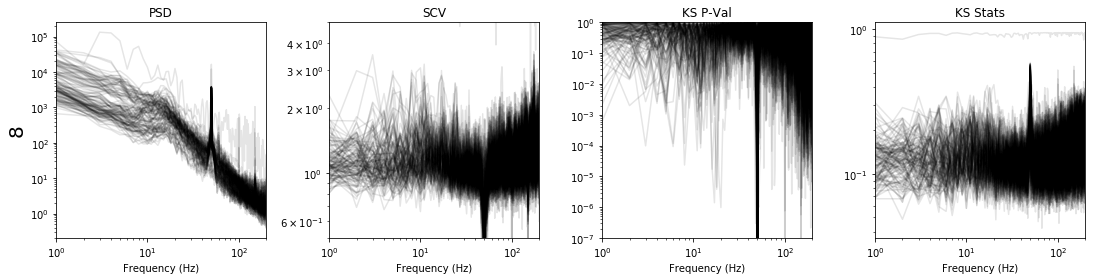

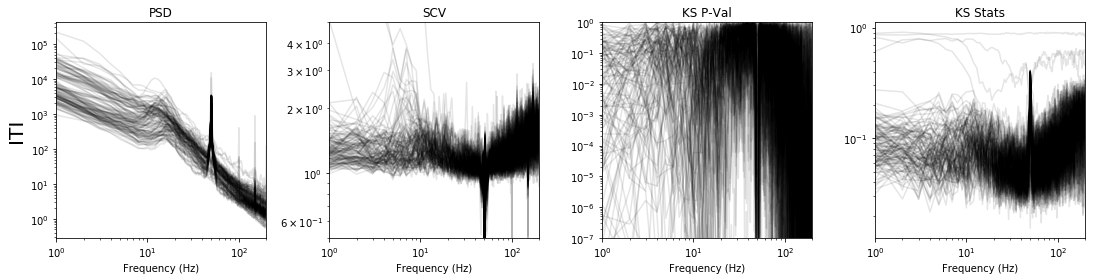

In [6]:
lfpca_all = []
for f in range(len(lfpca_files)):
    nt_lfpca = lfpca.lfpca_load_spec(saveout_path+lfpca_files[f])
    lfpca_all.append(nt_lfpca)
    plt.figure(figsize=(15,4))
    nt_lfpca.plot_spectral(plot_mean=False)
    plt.subplot(1,4,1)
    plt.ylabel(lfpca_files[f][9:-4], fontsize=20)

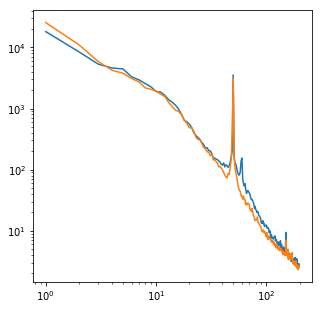

In [61]:
plot_chan=89
psd = []
for i, lf in enumerate(lfpca_all):
    psd.append(lf.psd[plot_chan,:])

plt.figure(figsize=(5,5))
plt.loglog(np.array(psd).mean(axis=0))
plt.loglog(lfpca_all[-1].psd[plot_chan,:])

1
2
3
4


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


5
6
7
8
ITI


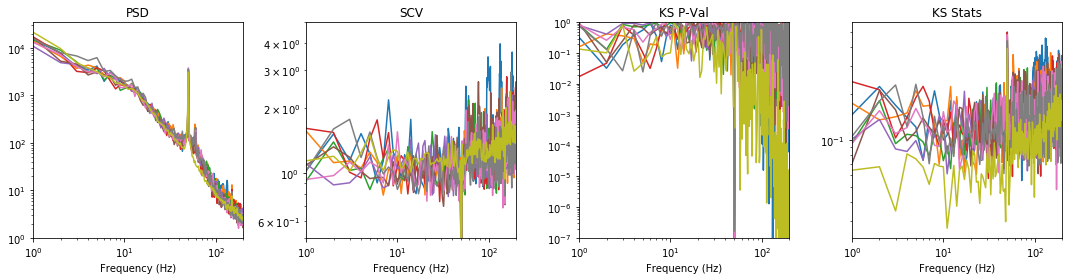

In [69]:
plt.figure(figsize=(15,4))
plot_chan = 90
for i, lf in enumerate(lfpca_all[:]):
    lf.plot_spectral(plot_mean=False, plot_chan=plot_chan, plot_color=CKEYS[i])
    print(lfpca_files[i][9:-4])

In [31]:
vg_lfpca_objs = np.empty((9,),dtype=object)

In [32]:
# data_path = "/Users/Lauren/Data/NeuroTycho/VisualGrating/20100723S1_VGT_K2_KazuhitoTakenaka-ToruYanagawa_mat_ECoG128-Event3/"
data_path = "/Volumes/VLABB/Neurotycho/VisualGrating/20100723S1_VGT_K2_KazuhitoTakenaka-ToruYanagawa_mat_ECoG128-Event3/"
# setting event data into pandas dataframe
matfile = io.loadmat(data_path + 'Event.mat', squeeze_me=True)
EventData = matfile['EventData']
EventIndex = matfile['EventIndex']

df = pd.DataFrame(data = [EventData, EventIndex]).T
df = df.rename(columns={0: 'EventData', 1: 'EventIndex'})

# blanks
ITI = df[(df['EventData'] > 300) & (df['EventData'] < 400)]

# different stimulations 1 to 8 according to the boundary edges
edges = [(650,750), (950,1050), (1300,1400), (1600,1700), (1950,2050), (2250,2350), (2600,2700), (2900,3000)]
stims = np.empty((8,),dtype=object)
for i,edge in enumerate(edges):
    lower = edge[0]
    upper = edge[1]
    stims[i]= df[(df['EventData'] > lower) & (df['EventData'] < upper)]
    
# getting session data
session = 0
chan = np.arange(1,129).tolist()
# chan = [1]
data = asc.get_ECoG(data_path, session, chan)

# ITI blank data
ITIdata = np.vstack((data[0][ITI['EventIndex']], data[1][ITI['EventIndex']]))
for c in range(2,128):
    ITIdata = np.vstack((ITIdata, data[c][ITI['EventIndex']]))

In [34]:
# example of using LFPCA
fs = 1000
analysis_param = {'nperseg': 1000,
                  'noverlap': 0,
                  'spg_outlierpct': 2.,
                  'max_freq':200}

vg_lfpca = lfpca.LFPCA(analysis_param)
vg_lfpca.populate_ts_data(ITIdata, fs)
vg_lfpca_objs[8] = vg_lfpca

In [35]:
# different stim data
def get_stimdata(data, num):
    stimdata = None
    stimdata = np.vstack((data[0][stims[num]['EventIndex']], data[1][stims[num]['EventIndex']]))
    for c in range(2,128):
        stimdata = np.vstack((stimdata, data[c][stims[num]['EventIndex']]))
    return stimdata



session_labels = np.arange(0,8).tolist()

for i in session_labels:
    stimdata = get_stimdata(data, i)
    # initialize object with data and parameters
    vg_lfpca = lfpca.LFPCA(analysis_param)
    print(i)
    vg_lfpca.populate_ts_data(stimdata, fs)
    # compute all spectral attributes
    vg_lfpca.compute_all_spectral()
    vg_lfpca_objs[i] = vg_lfpca

0
1
2
3
4
5
6
7
